# I Perkenalan
=================================================

Nama : Gieorgie Kharismatik Kosasih

Dataset : [data](https://www.kaggle.com/datasets/andrewmvd/trip-advisor-hotel-reviews)

Deployment : [model deployment](https://huggingface.co/spaces/Gieorgie/Tripadvisior_Sentiment_Analysis)

=================================================

## Latar Belakang


Ulasan pengguna terhadap layanan hotel di Trip Advisor menjadi sumber penting dalam industri perhotelan untuk memahami preferensi dan pengalaman pelanggan secara mendalam. Informasi yang terkandung dalam ulasan tersebut tidak hanya mencakup aspek positif dan negatif dari pelayanan hotel, tetapi juga memberikan gambaran yang jelas tentang faktor-faktor yang mempengaruhi kepuasan pengguna.

## Problem Statement

Dalam konteks ini, tujuan utama proyek adalah untuk mengembangkan sebuah model yang dapat secara otomatis mengklasifikasikan sentimen dari ulasan hotel. Hal ini akan memungkinkan untuk secara efisien menganalisis umpan balik pengguna dalam skala besar, memberikan wawasan yang mendalam tentang elemen-elemen yang paling mempengaruhi pengalaman pelanggan di hotel, serta memberikan alat yang berguna bagi manajemen hotel untuk merespons ulasan dengan lebih efektif.

## Objective

Proyek ini bertujuan untuk melakukan pemrosesan dan persiapan data menggunakan teknik Natural Language Processing (NLP), mengimplementasikan Artificial Neural Network (ANN) untuk mengklasifikasikan sentimen dari ulasan-ulasan tersebut, dan mengukur serta menjelaskan performa model ANN berdasarkan metrik-metrik evaluasi seperti akurasi dan AUC. Dengan demikian, diharapkan bahwa model yang dikembangkan dapat memberikan kontribusi signifikan dalam meningkatkan manajemen dan pengalaman pengguna di industri perhotelan.

# II Import Libraries

In [1]:
pip install contractions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 8.2 MB/s eta 0:00:00


In [2]:
# Library Pengolahan Data
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

# Library Visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# Library Split Test dan Train
from sklearn.model_selection import train_test_split

# Library Pre-Processing
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords') # Stopwords
nltk.download('punkt') # Punctuation
nltk.download('wordnet') # Wordnet
nltk.download('omw-1.4')
import string
from nltk.stem import WordNetLemmatizer, PorterStemmer
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from tensorflow.keras.utils import to_categorical
import contractions

# Library wordcloud
from wordcloud import WordCloud

# Library Model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, BatchNormalization, Dropout, Activation, LSTM, GRU, TextVectorization, Embedding,Bidirectional,Dropout
from tensorflow.keras import Model
import tensorflow_hub as hub
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping


# Library Evaluasi
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay,confusion_matrix, roc_auc_score
from collections import Counter

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


# III Data Loading

In [3]:
# df = pd.read_csv('/content/drive/MyDrive/GC 7/tripadvisor_hotel_reviews.csv')

In [4]:
df = pd.read_csv('tripadvisor_hotel_reviews.csv')

In [5]:
df.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  20491 non-null  object
 1   Rating  20491 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 320.3+ KB


In [7]:
df.duplicated().sum()

0

Tidak terdapat duplikasi pada data, maka akan dilihat target berisikan apa saja

In [8]:
df['Rating'].unique()

array([4, 2, 3, 5, 1])

Dalam data terdapat variasi rating mulai dari 1 sampai dengan 5 bintang. rating ini yang akan menjadikan target kemudian dikelompokan menjadi positive, neutral, dan negatif.

# IV Exploratory Data Analysis
Pada tahapan ini dilakukan explorasi terhadap data mulai dari melihat karakteristik setiap target, kata kata yang paling sering muncul serta analisa lainnya yang akan menjadi dasar untuk proses text preprosessing

In [9]:
# membuat copy data untuk EDA
df_eda = df.copy()

## Distribusi Target

In [10]:
# hitung rating
df_eda['Rating'].value_counts()

Rating
5    9054
4    6039
3    2184
2    1793
1    1421
Name: count, dtype: int64

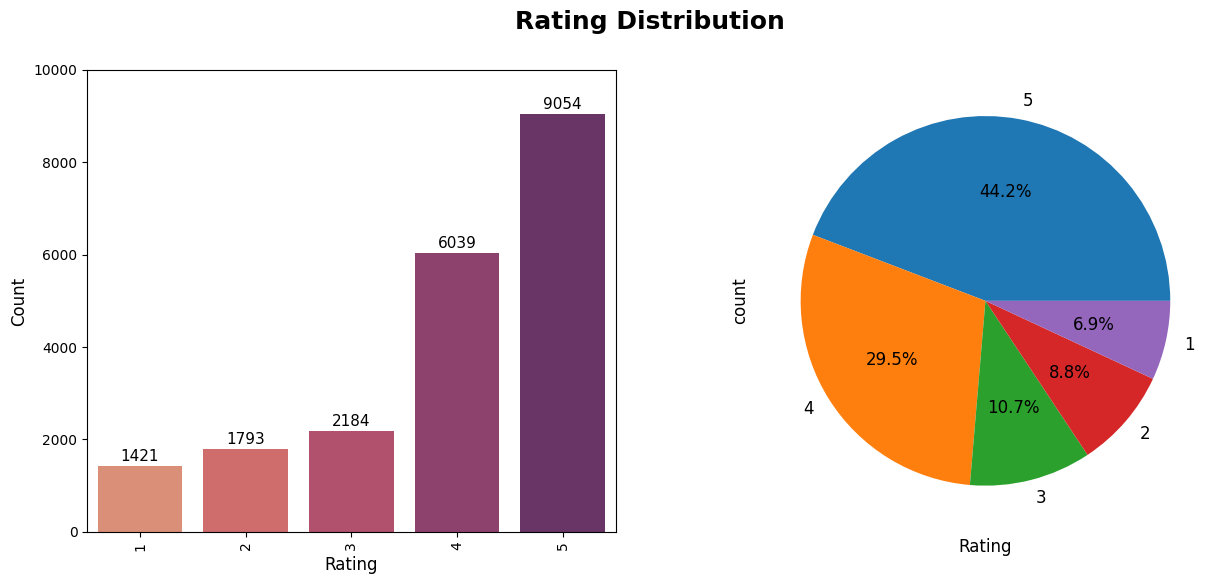

In [11]:
# Membuat visualisasi Distribusi Rating
fig, ax =plt.subplots(1,2,figsize=(15,6))

sns.countplot(x='Rating', data=df_eda, palette="flare", ax=ax[0])
ax[0].set_xlabel("Rating", fontsize= 12)
ax[0].set_ylabel("Count", fontsize= 12)
fig.suptitle('Rating Distribution', fontsize=18, fontweight='bold')
ax[0].set_ylim(0,10000)
ax[0].tick_params(axis='x', rotation=90)
plt.xlabel("Rating", fontsize= 12)
plt.ylabel("Count", fontsize= 12)

for p in ax[0].patches:
    ax[0].annotate("%.0f"%(p.get_height()), (p.get_x() + p.get_width() / 2,
                    p.get_height()+205), ha='center', va='center',fontsize = 11)

df_eda['Rating'].value_counts().plot(kind='pie',autopct='%1.1f%%', textprops = {"fontsize":12})
plt.show()

Grafik menunjukan bahwa rating paling banyak adalah 5 dengan total 9054 dengan presentase keseluruhan 44,2%.Project ini akan melakukan sentimen analysis maka value rating yang ada akan di konversi dimana rating 5 dan 4 termasuk dalam Positive , 3 adalah Neutral, dan 1 dan 2 adalah Negative.

In [12]:
# mengubah label rating menjadi kategori
def ratings(rating):
  if rating > 3:
    return "Positive"
  elif rating == 3:
    return "Neutral"
  else:
    return "Negative"

df['Rating'] = df['Rating'].apply(ratings)
df_eda['Rating'] = df_eda['Rating'].apply(ratings)

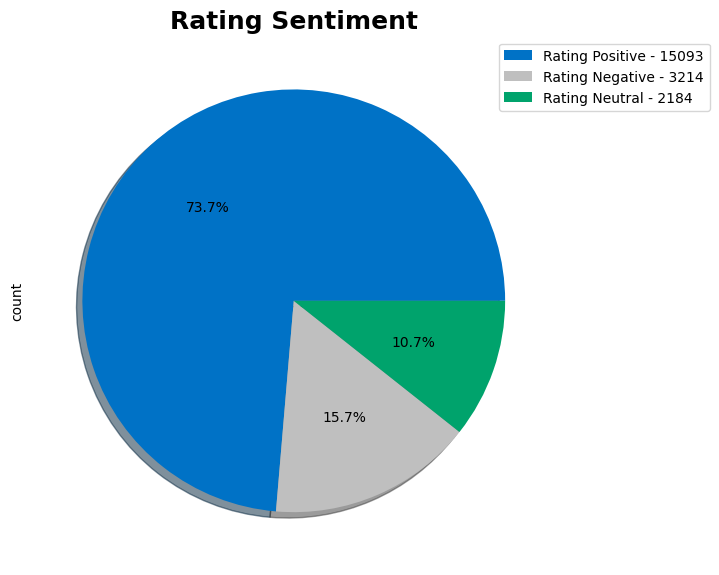

In [13]:
# Menghitung jumlah value unik
target = df['Rating'].nunique()

# Menghitung jumlah setiap value
target_counts = df['Rating'].value_counts()

# Membuat label untuk legenda dengan jumlah setiap value
labels = [f'Rating {i} - {count}' for i, count in target_counts.items()]

# Membuat pie chart
plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 2)
target_counts.plot(kind='pie', autopct='%1.1f%%',  shadow=True, labels=None, colors =['#0072C6', '#BFBFBF', '#00A36C'])
plt.title('Rating Sentiment',fontsize=18, fontweight='bold')

# Menambahkan legenda
plt.legend(labels, loc='upper right', bbox_to_anchor=(1.3, 1))

plt.show()

Terlihat setelah rating dikelompokkan, kelompok neutral ternyata jumlahnya lebih sedikit dibandingkan yang negative dan positive adalah kelas terbanyak pada data. Data ini tergolong dalam data unbalance dimana proporsi salah satu kelas jauh dari yang lain.

## Sampel review
Berikut merupakan beberapa sample acak yang ada dalam data.


In [14]:
pd.set_option('display.width', None)
sample_Positive = df_eda[df_eda['Rating']=='Positive'].sample(n=5)
sample_Neutral = df_eda[df_eda['Rating']=='Neutral'].sample(n=5)
sample_Negative = df_eda[df_eda['Rating']=='Negative'].sample(n=5)

# Print Sample Positive
print('Sample Positive')
print('-'*100)
for i in range(0,5):
    print(sample_Positive.iloc[i,0])
print('-'*100)

# Print Sample Neutral
print('Sample Neutral')
print('-'*100)
for i in range(0,5):
    print(sample_Neutral.iloc[i,0])
print('-'*100)

# Print Sample Negative
print('Sample Negative')
print('-'*100)
for i in range(0,5):
    print(sample_Negative.iloc[i,0])
print('-'*100)


Sample Positive
----------------------------------------------------------------------------------------------------
real gem, sihe hotel real gem stay beijing week, idea book room larger well-known hotels certainly good room local charm reviews trip advisor decided try luck smaller hotel n't regretted decission booked executive rooms, spatious direct access central courtyard, furniture chinese assured bed long westerners 1m80 gives splendid local charm looking for.although house dates days quing dynasty hotel offers modern luxuries clean room bathroom bath western toilet internet access works no buffet-style breakfast morning choose kinds breakfast western-style eastern-style, offered choices change days.the staff friendly helpfull, english adequate,  
great, great hotel, used booking.com really good rates, price reasonable, desk staff extremely helpful patient question request, free lemonade beer water minibar cool, room beautiful view excellent, shower great 6 different water spouts

Sesuai keterangan pada data, data berisikan review orang terhadap hotel yang dipesan melalui trip advisior jika kita melihat karakteristik masing masing sampel:

**Positive**

Customers merasa sangat puas akan serivce yang diberikan hotel terhadap mereka dan tidak ada kata-kata customers yang menandakan ketidak puasan terhadap hotel yang dipesan.

**Neutral**

Secara garis besar customers memuji terkati kondisi hotel tetapi terdapat 2 atau 1 point kekurangan yang disarankan customers untuk di tingkatkan.


**Negative**

Tidak ada kata kata yang melambangkan makna positive dari karakteristik class ini, isi dari review berkaitan dengan ketidak kepuasan customers terhadap hotel yang dipesan.

Dari hasil keseluruhan concern customers terkait dengan pelayanan hotel, kodisi fasilitas hotel, dan apakah harga yang mereka keluarkan untuk mememsan hotel sesuai dengan apa yang mereka dapatkan.

Berkatian dengan preprocessing data didapat beberapa insight dari hasil explorasi ini:
- Terlihat bahwa panjang corpus bervariatif pada setiap kelas, hal ini akan dilihat gambarannya pada saat statiska deskriptif.
- Bahasa yang digunakan adalah bahasa inggris tetapi yang tidak baku dan terlihat ada beberapa singkatan seperti `n't` yang seharusnya `not` dan `hrs` yang seharusnya `hours`. ada beberapa slang dalam review terkait dengan masalah ini akan di atasi pada tahapan selanjutnya.

## Word Count

In [15]:
# Document length
df_eda['Review_length'] = df_eda['Review'].apply(lambda x: len(nltk.word_tokenize(x)))
df_eda.head()

,Review,Rating,Review_length
0,nice hotel expensive parking got good deal sta...,Positive,98
1,ok nothing special charge diamond member hilto...,Negative,270
2,nice rooms not 4* experience hotel monaco seat...,Neutral,236
3,"unique, great stay, wonderful time hotel monac...",Positive,102
4,"great stay great stay, went seahawk game aweso...",Positive,224


In [16]:
print('Max kalimat pada setiap review adalah ', df_eda['Review_length'].max())
print('Mean kalimat pada setiap review adalah ', df_eda['Review_length'].mean())
print('-'*100)
# Display minimum, average and maximum of words
for Rating in df_eda['Rating'].unique():
  print('Rating: ', Rating)
  print('Minimum word count: ', df_eda[df_eda['Rating'] == Rating]['Review_length'].min())
  print('Maximum word count: ', df_eda[df_eda['Rating'] == Rating]['Review_length'].max())
  print('Average word count: ', round(df_eda[df_eda['Rating'] == Rating]['Review_length'].mean(), 2))
  print('-'*100)

Max kalimat pada setiap review adalah  2190
Mean kalimat pada setiap review adalah  116.63466887902005
----------------------------------------------------------------------------------------------------
Rating:  Positive
Minimum word count:  9
Maximum word count:  2103
Average word count:  111.24
----------------------------------------------------------------------------------------------------
Rating:  Negative
Minimum word count:  12
Maximum word count:  1249
Average word count:  134.2
----------------------------------------------------------------------------------------------------
Rating:  Neutral
Minimum word count:  10
Maximum word count:  2190
Average word count:  128.05
----------------------------------------------------------------------------------------------------


Berdasarkan analisis data ulasan hotel, ditemukan bahwa panjang ulasan bervariasi dengan signifikan antara rating positif, negatif, dan netral. Ulasan dengan rating positif memiliki panjang minimum 9 kata dan maksimum 2103 kata, dengan rata-rata 111.24 kata per ulasan. Ulasan negatif memiliki panjang minimum 12 kata dan maksimum 1249 kata, dengan rata-rata 134.2 kata. Sementara itu, ulasan netral memiliki panjang minimum 10 kata dan maksimum 2190 kata, dengan rata-rata 128.05 kata. Ini menunjukkan bahwa meskipun ulasan netral cenderung lebih panjang dibandingkan dengan ulasan positif dan negatif, perbedaan rata-rata kata per ulasan antara ketiga kategori tidak terlalu besar, dengan ulasan negatif sedikit lebih panjang dibandingkan dengan ulasan netral.

## Word Cloud

## Word cloud seluruh review

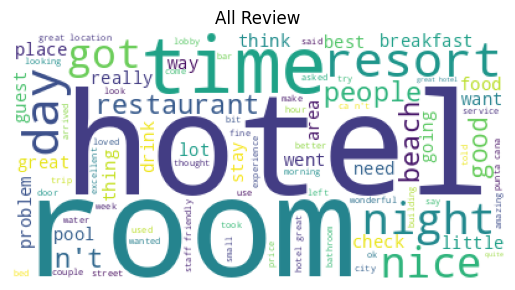

In [17]:
# All Review
text = df_eda['Review'].values
wordcloud = WordCloud(background_color="white").generate(" ".join(text))

# Plot word cloud
plt.imshow(wordcloud)
plt.axis("off")
plt.title('All Review')
plt.show()

In [18]:
# Membuat top 20 highest
df_eda['review_list'] = df_eda['Review'].apply(lambda x:str(x).split())
word_count = Counter([item for sublist in df_eda['review_list'] for item in sublist])
review_word_count = pd.DataFrame(word_count.most_common(15))
review_word_count.columns = ['Words','Count']
review_word_count

,Words,Count
0,hotel,42079
1,not,30750
2,room,30532
3,great,18732
4,n't,18436
5,staff,14950
6,good,14791
7,did,13433
8,just,12458
9,stay,11376


- Pada word cloud keseluruhan review terlihat bahwa kata yang paling sering muncul adalah hotel,room,time,dan night.
- Terlihat ada penulisan kata yang di singkat seperti `not` menjadi `n't` dan ada penggunaan verb seperti `stayed` yang memiliki arti yang sama dengan `stay`.

### Positive word cloud

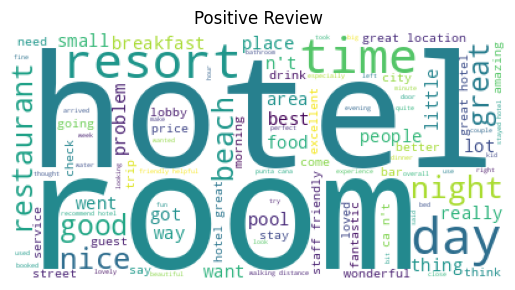

In [19]:
text = df_eda[df_eda['Rating'] == 'Positive']['Review'].values
wordcloud = WordCloud(background_color="white").generate(" ".join(text))

# Plot word cloud
plt.imshow(wordcloud)
plt.axis("off")
plt.title('Positive Review')
plt.show()

Pada positive word cloud kata yang sering muncul seperti pada keseluruhan tetapi dengan tambahan kata kata positive seperti `nice`,`great`,dan `good`.



### Neutral word cloud

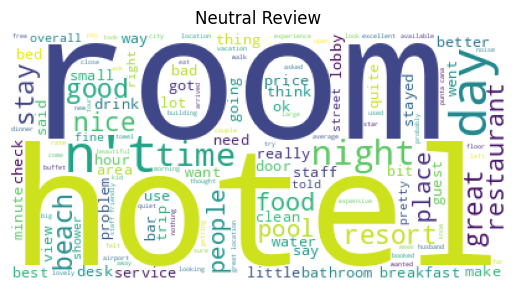

In [20]:
text = df_eda[df_eda['Rating'] == 'Neutral']['Review'].values
wordcloud = WordCloud(background_color="white").generate(" ".join(text))

# Plot word cloud
plt.imshow(wordcloud)
plt.axis("off")
plt.title('Neutral Review')
plt.show()

Pada word cloud neutral terlihat bahwa kata yang sering muncul masih sama dengan keseluruhan tetapi sudah ada kata yang mengandung makna negative seperti `bad`.

### Negative word cloud

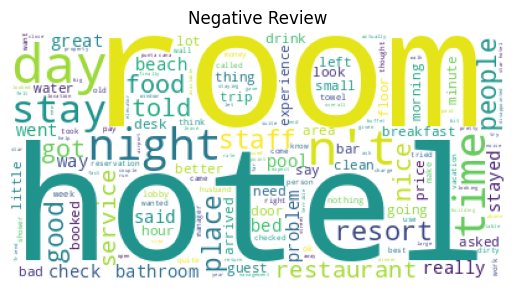

In [21]:
text = df[df['Rating'] == 'Negative']['Review'].values
wordcloud = WordCloud(background_color="white").generate(" ".join(text))

# Plot word cloud
plt.imshow(wordcloud)
plt.axis("off")
plt.title('Negative Review')
plt.show()

Pada word cloud negative terlihat beberapa kata negative seperti `bad` dan `dirty` tapi perlu diperhatikan bisa saja kata positive yang ada dalam word cloud ditambahkan dengan `not` dapat menjadi arti yang negative.

# V Data Pre-processing
pada tahapan ini dilakukan text preprosesing meliputi:

## Text Preprocessing
Berdasarkan EDA maka saya menerapkan text pre-processing sebagai berikut :

**Case folding**

Terlihat dari sampel dan bentuk word cloud memang data tidak terdapat uppercase akan tetapi dikarenakan waktu yang ada untuk mengerjakan project ini terbatas maka data tetap akan dilakukan perubahan ke lowercase

**Remove Stopwords**

Berdarsarkan hasil eda terlihat bahwa seluruh class memiliki mengandung kata terbanyak yang sama yaitu `hotel`,`room`dan `n't` atau `not`. karena seluruh review befokus pada review hotel dan berkaitan dengan room maka kata hotel dan room dapat ditambahkan kedalam stopword.

**Contractions**
Dari sampel yang ditampilkan terdapat kata yang memiliki kontraksi contohnya `n't`, ini akan di handle mengunakan contraction agar kata yang mengandung kontraksi akan dikembalikan ke bentuk semula contohnya `n't` menjadi `not`

**Remove Emoticon dan Simbol**

Dilakukan penghilangan simbol atau emoticon pada data untuk memastikan data yang ada memiliki makna dan mengurangi noise pada data.

**Remove Whitespace**

Memastikan dan menghilangkan whitespace pada data.

**Lemmatizer**

Data akan dilakukan lemmatizer ketimbang stemming dikarenakan stemming hanya melakukan pemotongan pada akhiran kata untuk menghilangkan infleksi atau derivasi tanpa mempertimbangkan konteks,sebaliknya lemmatizer mempempertimbangkan konteks.

**Word Tokenizer**

Saya menggunakan word tokenizer karena kombinasi dari kalimat sangat banyak sekali, sehingga jika 1 kalimat dijadikan 1 token maka hasil model akan kurang akurat.

Kemudian saya akan definisikan additional stopwords sebelum mendefinisikan fungsi cleaning

In [22]:
# Define stopwords
stopwords_nltk = list(set(stopwords.words('english')))
stopwords_add = ['hotel','room']
stopwords_all = stopwords_nltk + stopwords_add

# Define lemmatizer
lemmatizer = WordNetLemmatizer()

In [23]:
# Make a function of text preprocessing

def clean_review(review):

    # make text lowercase
    review = review.lower()

    # fix contractions
    review = contractions.fix(review)

    # remove word with only 3 char
    review = re.sub(r'\b\w{1,3}\b', " ",review)

    # remove punctuation
    review = re.sub('[%s]' % re.escape(string.punctuation), '', review)

    # remove words containing numbers
    review = re.sub('\w*\d\w*', '', review)

    # remove non-latin words
    review = re.sub('[^\x00-\x7f]', '', review)

    # remove non-words (emoji, etc.)
    review = re.sub("[^A-Za-z\s']", " ", review)

    # remove underscores
    review =  str.replace(review, '_', '')

    # remove whitespace
    review = review.strip()

    # Tokenization
    tokens = word_tokenize(review)

    # Remove Stopwords
    review = [word for word in tokens if word not in stopwords_all]

    # Lemmatize the word
    sentence = []
    for word in review:
      sentence.append(lemmatizer.lemmatize(word))
    # combine
    review = ' '.join(sentence)

    return review

In [24]:
df['Review_processed'] = df['Review'].apply(lambda x: clean_review(x))


# VI Exploratory Data Analysis after Preprocessing

setelah melakukan preprocessing data akan dilihat perbedaan sebelum dan sesudah penanganan preprocessing pada data.

## Sample after preprocessing

In [25]:
df[['Review', 'Review_processed']].head()

,Review,Review_processed
0,nice hotel expensive parking got good deal sta...,nice expensive parking good deal stay annivers...
1,ok nothing special charge diamond member hilto...,nothing special charge diamond member hilton d...
2,nice rooms not 4* experience hotel monaco seat...,nice room experience monaco seattle good level...
3,"unique, great stay, wonderful time hotel monac...",unique great stay wonderful time monaco locati...
4,"great stay great stay, went seahawk game aweso...",great stay great stay went seahawk game awesom...


Terlihat setelah dilakukan preprocessing panjang review berkurang. pada tahapan selanjutnya akan di identifikasi lebih mendalam.

## Word Count after preprocessing

In [26]:
df['Review_preprocessed_length'] = df['Review_processed'].apply(lambda x: len(nltk.word_tokenize(x)))
df['Review_length'] = df['Review'].apply(lambda x: len(nltk.word_tokenize(x)))

In [27]:
# Print Max and Average word
print('Max')
print('Max kata pada setiap review sebelum Pre-Processing adalah ', df['Review_length'].max())
print('Max kata pada setiap review setelah Pre-Processing adalah ', df['Review_preprocessed_length'].max())
print('Persentase setelah Pre-Processing ',round((df['Review_preprocessed_length'].max()/df['Review_length'].max()*100),2))

print('-'*100)
print('Mean')
print('Mean kata pada setiap review sebelum Pre-Processing adalah ', round(df['Review_length'].mean(),2))
print('Mean kata pada setiap review setelah Pre-Processing adalah ', round(df['Review_preprocessed_length'].mean(),2))
print('Persentase setelah Pre-Processing ',round((df['Review_preprocessed_length'].mean()/df['Review_length'].mean()*100),2))

Max
Max kata pada setiap review sebelum Pre-Processing adalah  2190
Max kata pada setiap review setelah Pre-Processing adalah  1642
Persentase setelah Pre-Processing  74.98
----------------------------------------------------------------------------------------------------
Mean
Mean kata pada setiap review sebelum Pre-Processing adalah  116.63
Mean kata pada setiap review setelah Pre-Processing adalah  84.91
Persentase setelah Pre-Processing  72.8


Setelah melakukan proses pre-processing pada data ulasan hotel, terlihat bahwa ada penurunan signifikan dalam jumlah kata rata-rata dan maksimum pada setiap ulasan. Sebelum pre-processing, rata-rata jumlah kata per ulasan adalah 116.63 kata, sedangkan setelah pre-processing, rata-rata tersebut turun menjadi 84.91 kata. Persentase penurunan ini adalah sekitar 27.2%. Secara khusus, panjang maksimum ulasan sebelum pre-processing adalah 2190 kata, yang kemudian turun menjadi 1642 kata setelah proses tersebut dilakukan. Persentase penurunan untuk panjang maksimum adalah sekitar 25.02%.

In [28]:
# Print Max dan Average Kata dari setiap kelas review
review_class = ['Positive','Neutral','Negative']
for i in review_class :
    print('class ', i)
    print('Max kata pada setiap review sebelum Pre-Processing adalah ', df[df['Rating'] == i]['Review_length'].max())
    print('Max kata pada setiap review setelah Pre-Processing adalah ', df[df['Rating'] == i]['Review_preprocessed_length'].max())
    print('Persentase setelah Pre-Processing ',round((df[df['Rating'] == i]['Review_preprocessed_length'].max()/df[df['Rating'] == i]['Review_length'].max()*100),2))
    print('Mean kata pada setiap review sebelum Pre-Processing adalah ', round(df[df['Rating'] == i]['Review_length'].mean(),2))
    print('Mean kata pada setiap review setelah Pre-Processing adalah ', round(df[df['Rating'] == i]['Review_preprocessed_length'].mean(),2))
    print('Persentase setelah Pre-Processing ', round((df[df['Rating'] == i]['Review_preprocessed_length'].mean()/df[df['Rating'] == i]['Review_length'].mean()*100),2))
    print('-'*100)

class  Positive
Max kata pada setiap review sebelum Pre-Processing adalah  2103
Max kata pada setiap review setelah Pre-Processing adalah  1472
Persentase setelah Pre-Processing  70.0
Mean kata pada setiap review sebelum Pre-Processing adalah  111.24
Mean kata pada setiap review setelah Pre-Processing adalah  81.72
Persentase setelah Pre-Processing  73.46
----------------------------------------------------------------------------------------------------
class  Neutral
Max kata pada setiap review sebelum Pre-Processing adalah  2190
Max kata pada setiap review setelah Pre-Processing adalah  1642
Persentase setelah Pre-Processing  74.98
Mean kata pada setiap review sebelum Pre-Processing adalah  128.05
Mean kata pada setiap review setelah Pre-Processing adalah  91.62
Persentase setelah Pre-Processing  71.55
----------------------------------------------------------------------------------------------------
class  Negative
Max kata pada setiap review sebelum Pre-Processing adalah  1249
Ma

Setelah dilakukan proses pre-processing pada data ulasan hotel berdasarkan kelas sentimen (positif, netral, negatif), terdapat penurunan signifikan dalam panjang maksimum dan rata-rata ulasan untuk setiap kategori. Untuk kelas sentimen positif, panjang maksimum ulasan sebelum pre-processing adalah 2103 kata, turun menjadi 1472 kata setelah pre-processing dengan persentase penurunan sebesar 70.0%. Rata-rata kata per ulasan positif juga mengalami penurunan dari 111.24 kata menjadi 81.72 kata, dengan penurunan sekitar 73.46%. Untuk kelas sentimen netral, panjang maksimum ulasan turun dari 2190 kata menjadi 1642 kata setelah pre-processing, dengan persentase penurunan sebesar 74.98%. Rata-rata kata per ulasan netral juga mengalami penurunan dari 128.05 kata menjadi 91.62 kata, dengan penurunan sekitar 71.55%. Sedangkan untuk kelas sentimen negatif, panjang maksimum ulasan turun dari 1249 kata menjadi 917 kata setelah pre-processing, dengan persentase penurunan sebesar 73.42%. Rata-rata kata per ulasan negatif juga mengalami penurunan dari 134.2 kata menjadi 95.36 kata, dengan penurunan sekitar 71.06%. Perubahan ini menunjukkan bahwa proses pre-processing berhasil mengurangi kompleksitas teks dalam setiap kategori sentimen, menjadikannya lebih siap untuk analisis lebih lanjut.

## Word cloud after preprocessing

### Word cloud positive (preprocessing)

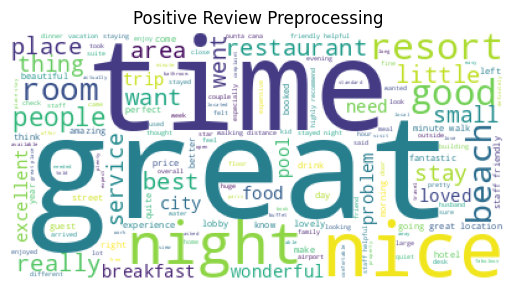

In [29]:
text = df[df['Rating'] == 'Positive']['Review_processed'].values
wordcloud = WordCloud(background_color="white").generate(" ".join(text))

# Plot word cloud
plt.imshow(wordcloud)
plt.axis("off")
plt.title('Positive Review Preprocessing')
plt.show()

### Word cloud neutral (preprocessing)

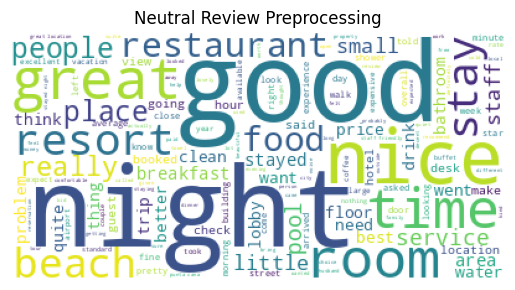

In [30]:
text = df[df['Rating'] == 'Neutral']['Review_processed'].values
wordcloud = WordCloud(background_color="white").generate(" ".join(text))

# Plot word cloud
plt.imshow(wordcloud)
plt.axis("off")
plt.title('Neutral Review Preprocessing')
plt.show()

### Word cloud negative (preprocessing)

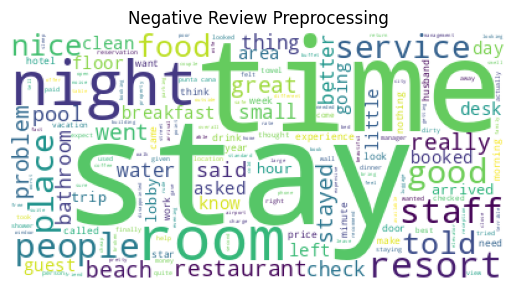

In [31]:
text = df[df['Rating'] == 'Negative']['Review_processed'].values
wordcloud = WordCloud(background_color="white").generate(" ".join(text))

# Plot word cloud
plt.imshow(wordcloud)
plt.axis("off")
plt.title('Negative Review Preprocessing')
plt.show()

Terlihat pada keseluruhan wordcloud bahwa kata kata yang sudah

## Target Encoding
setelah selesai melakukan explorasi data target akan di encoding.

In [32]:
df['Rating'].value_counts()

Rating
Positive    15093
Negative     3214
Neutral      2184
Name: count, dtype: int64

In [33]:
df['Target'] = df['Rating'].replace({'Positive':2,
                                     'Neutral':1,
                                     'Negative':0})
df.head()

,Review,Rating,Review_processed,Review_preprocessed_length,Review_length,Target
0,nice hotel expensive parking got good deal sta...,Positive,nice expensive parking good deal stay annivers...,72,98,2
1,ok nothing special charge diamond member hilto...,Negative,nothing special charge diamond member hilton d...,205,270,0
2,nice rooms not 4* experience hotel monaco seat...,Neutral,nice room experience monaco seattle good level...,156,236,1
3,"unique, great stay, wonderful time hotel monac...",Positive,unique great stay wonderful time monaco locati...,75,102,2
4,"great stay great stay, went seahawk game aweso...",Positive,great stay great stay went seahawk game awesom...,159,224,2


## Data Spliting

Pada tahapan ini data akan dibagi menjadi 3 bagian yaitu train set, validation set, dan test set.

In [34]:
# Train, validation, test set
X_train_val, X_test, y_train_val, y_test = train_test_split(df['Review_processed'],
                                                            df['Target'],
                                                            test_size = 0.15,
                                                            random_state = 17,
                                                            stratify=df['Target'])

X_train, X_val, y_train, y_val = train_test_split(X_train_val,
                                                  y_train_val,
                                                  test_size = 0.15,
                                                  random_state = 17,
                                                  stratify=y_train_val)

print('Train Size : ', X_train.shape)
print('Val Size   : ', X_val.shape)
print('Test Size  : ', X_test.shape)

Train Size :  (14804,)
Val Size   :  (2613,)
Test Size  :  (3074,)


In [35]:
# Change Target to One Hot Encoding

y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

## Text Vectorization


Dalam tahapan ini, text vectorization diperlukan untuk mengubah teks menjadi representasi numerik yang dapat diproses oleh komputer. Ini memungkinkan model machine learning untuk memahami dan memanipulasi data teks, mengatasi masalah seperti dimensi data yang besar, representasi kata-kata, dan memperlancar proses pembelajaran serta analisis data.

In [36]:
# Bag of words
Vectorize = CountVectorizer()
X_train_vec = Vectorize.fit_transform(X_train)
X_val_vec = Vectorize.transform(X_val)
X_test_vec = Vectorize.transform(X_test)

X_train_vec

<14804x45985 sparse matrix of type '<class 'numpy.int64'>'
	with 1022869 stored elements in Compressed Sparse Row format>

In [37]:
# Number of vocabs and maximum number of token
total_vocab = len(Vectorize.vocabulary_.keys())
max_sen_len = max([len(i.split(" ")) for i in X_train])

print('Total Vocab: ', total_vocab)
print('Maximum Sentence Length: ', max_sen_len, 'tokens')

Total Vocab:  45985
Maximum Sentence Length:  1642 tokens


# VII Model Definition

In [38]:
# Text Vectorization

text_vectorization = TextVectorization(max_tokens=total_vocab,
                                       standardize="lower_and_strip_punctuation",
                                       split="whitespace",
                                       ngrams=None,
                                       output_mode="int",
                                       output_sequence_length=max_sen_len,
                                       input_shape=(1,))

text_vectorization.adapt(X_train)

In [39]:
# Top 20 token
text_vectorization.get_vocabulary()[:20]

['',
 '[UNK]',
 'great',
 'good',
 'staff',
 'stay',
 'night',
 'time',
 'nice',
 'room',
 'location',
 'service',
 'stayed',
 'restaurant',
 'beach',
 'breakfast',
 'place',
 'clean',
 'food',
 'resort']

## Word Embedding

In [40]:
# Embedding
embedding = Embedding(input_dim=total_vocab,
                      output_dim=128,
                      embeddings_initializer="uniform",
                      input_length=max_sen_len
                      )

## Model Building

LSTM dipilih karena kemampuannya dalam menangani data teks yang panjang dan mengatasi masalah vanishing gradient yang sering terjadi pada RNN (Recurrent Neural Network) konvensional. LSTM memungkinkan model untuk mengingat informasi jangka panjang, yang berguna dalam menganalisis urutan data seperti teks.

Metrics yang dipilih untuk evaluasi model adalah accuracy untuk mengukur keakuratan prediksi kelas sentimen secara keseluruhan, dan AUC (Area Under the ROC Curve) untuk mengevaluasi kemampuan model dalam memisahkan kelas sentimen dengan mempertimbangkan true positive rate dan false positive rate. Kombinasi metrics ini memberikan gambaran komprehensif tentang performa model dalam tugas klasifikasi teks, fokus pada akurasi prediksi dan kemampuan membedakan kelas-kelas sentimen.

In [41]:
# Model Training using LSTM
%%time

## Clear Session
seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

# Penyusunan Model
model_baseline = Sequential()

# Layer Text Vectorization
model_baseline.add(text_vectorization)

# Layer Embedding
model_baseline.add(embedding)

# Hidden Layer 1
model_baseline.add(LSTM(64, return_sequences=True))

# Hidden Layer 2
model_baseline.add(LSTM(32, return_sequences=True))

# Hidden Layer 3
model_baseline.add(LSTM(16, return_sequences=True))

# Hidden Layer 4
model_baseline.add(LSTM(8))

# Layer Output
model_baseline.add(Dense(3,activation='softmax'))

# Compile
model_baseline.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy','AUC'])

# Summary
model_baseline.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVe  (None, 1642)              0         
 ctorization)                                                    
                                                                 
 embedding (Embedding)       (None, 1642, 128)         5886080   
                                                                 
 lstm (LSTM)                 (None, 1642, 64)          49408     
                                                                 
 lstm_1 (LSTM)               (None, 1642, 32)          12416     
                                                                 
 lstm_2 (LSTM)               (None, 1642, 16)          3136      
                                                                 
 lstm_3 (LSTM)               (None, 8)                 800       
                                                        

- Terdapat empat layer LSTM dengan jumlah unit berturut-turut 64, 32, 16, dan 8. Penurunan jumlah unit per layer bertujuan untuk mengekstraksi fitur secara hierarkis dari teks.
- Output layer menggunakan aktivasi softmax karena masalah yang dihadapi adalah klasifikasi multikelas.
- Optimizer yang dipilih adalah 'adam', yang seringkali digunakan karena kecepatan konvergensi yang baik dan kemampuannya menangani masalah gradien yang jarang terjadi.
- Loss function yang digunakan adalah 'categorical_crossentropy', yang cocok untuk tugas klasifikasi multikelas.

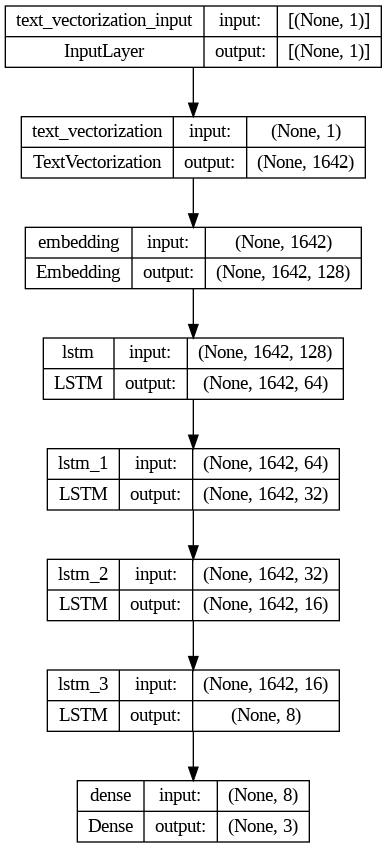

In [42]:

# plot layers

tf.keras.utils.plot_model(model_baseline, show_shapes=True)

#VIII Base Model Training

In [43]:
# Model training
model_baseline_hist = model_baseline.fit(X_train, y_train, epochs=25, batch_size = 128, validation_data=(X_val, y_val))

Epoch 1/25
116/116 [==============================] - 45s 315ms/step - loss: 0.7798 - accuracy: 0.7254 - auc: 0.8110 - val_loss: 0.7543 - val_accuracy: 0.7367 - val_auc: 0.8152
Epoch 2/25
116/116 [==============================] - 33s 286ms/step - loss: 0.7550 - accuracy: 0.7366 - auc: 0.8141 - val_loss: 0.7545 - val_accuracy: 0.7367 - val_auc: 0.8152
Epoch 3/25
116/116 [==============================] - 32s 279ms/step - loss: 0.7551 - accuracy: 0.7366 - auc: 0.8135 - val_loss: 0.7541 - val_accuracy: 0.7367 - val_auc: 0.8152
Epoch 4/25
116/116 [==============================] - 33s 282ms/step - loss: 0.7548 - accuracy: 0.7366 - auc: 0.8140 - val_loss: 0.7544 - val_accuracy: 0.7367 - val_auc: 0.8152
Epoch 5/25
116/116 [==============================] - 31s 270ms/step - loss: 0.7550 - accuracy: 0.7366 - auc: 0.8135 - val_loss: 0.7542 - val_accuracy: 0.7367 - val_auc: 0.8152
Epoch 6/25
116/116 [==============================] - 30s 258ms/step - loss: 0.7553 - accuracy: 0.7366 - auc: 0.814

In [44]:
history_baseline_df = pd.DataFrame(model_baseline_hist.history)
history_baseline_df.tail(5)

,loss,accuracy,auc,val_loss,val_accuracy,val_auc
20,0.754566,0.736625,0.814163,0.754462,0.736701,0.815155
21,0.754748,0.736625,0.812662,0.754203,0.736701,0.815155
22,0.754467,0.736625,0.816109,0.754466,0.736701,0.815155
23,0.754687,0.736625,0.814125,0.754194,0.736701,0.815155
24,0.754721,0.736625,0.813260,0.754279,0.736701,0.815155


<Axes: title={'center': 'Train vs Validation (Loss Function)'}>

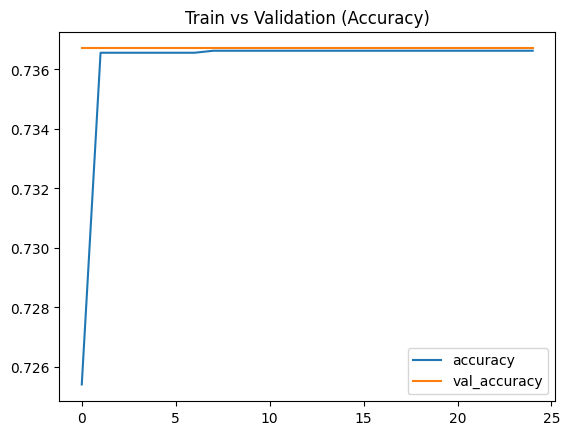

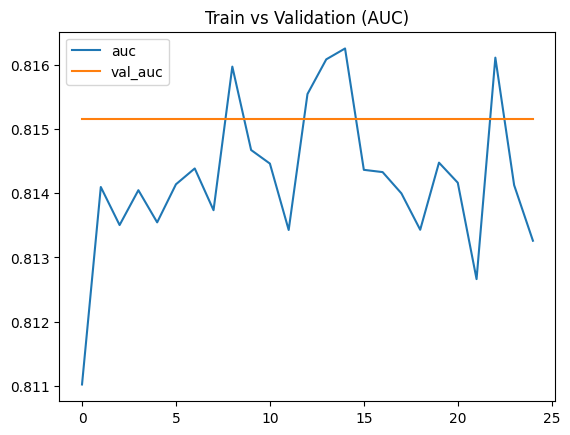

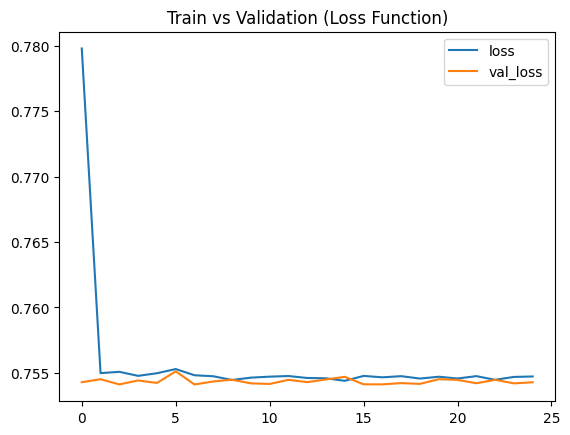

In [45]:
# Plot Traning Results
history_baseline_df[['accuracy', 'val_accuracy']].plot(title='Train vs Validation (Accuracy)')
history_baseline_df[['auc', 'val_auc']].plot(title='Train vs Validation (AUC)')
history_baseline_df[['loss', 'val_loss']].plot(title='Train vs Validation (Loss Function)')

In [57]:
# classification report
y_pred_baseline_proba = model_baseline.predict(X_test)
y_pred_baseline = np.argmax(y_pred_baseline_proba, axis=1)
if len(y_test.shape) > 1 and y_test.shape[1] > 1:
    y_test = np.argmax(y_test, axis=1)

# Daftar target names untuk laporan klasifikasi
target = ['Negative', 'Neutral', 'Positive']

# Cetak laporan klasifikasi
print(classification_report(y_test, y_pred_baseline, target_names=target))

97/97 [==============================] - 10s 95ms/step
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00       482
     Neutral       0.00      0.00      0.00       328
    Positive       0.74      1.00      0.85      2264

    accuracy                           0.74      3074
   macro avg       0.25      0.33      0.28      3074
weighted avg       0.54      0.74      0.62      3074



Dari classification report, terlihat bahwa model memiliki performa yang baik dalam mengklasifikasikan kelas 'Positive', dengan precision sekitar 74% dan recall 100%. Namun, untuk kelas 'Negative' dan 'Neutral', precision dan recall mendekati nol, yang menunjukkan model gagal mengenali dan memprediksi dengan benar ulasan-ulasan yang memiliki sentimen negatif atau netral.

In [47]:
# Perhitungan AUC
prob_baseline = model_baseline.predict(X_test)
auc_baseline = roc_auc_score(y_test, prob_baseline, multi_class='ovr')
auc_baseline

97/97 [==============================] - 9s 94ms/step


0.499782419445177

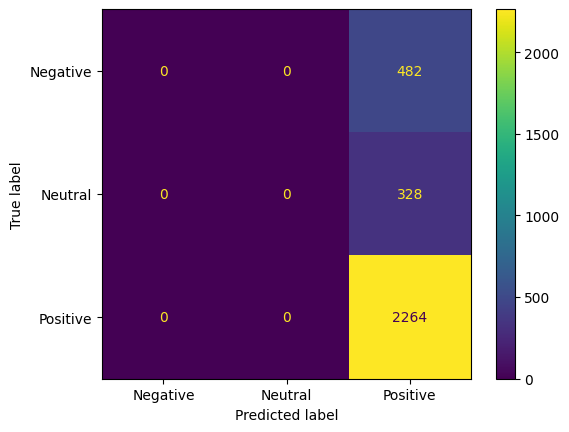

In [61]:
# Hitung confusion matrix
cm_test_baseline = confusion_matrix(y_test, y_pred_baseline)

# Tampilkan confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test_baseline, display_labels=target)
disp.plot()

## Base model analysis
Model perlu dilakukan improvement karena adanya beberapa masalah yang teridentifikasi dari evaluasi yang dilakukan:

1. Model menunjukkan kecenderungan untuk mengabaikan atau salah mengklasifikasikan ulasan dengan sentimen negatif dan netral. Hal ini mengindikasikan bahwa model tidak mampu dengan baik mengenali variasi sentimen yang berbeda dalam dataset.

2. F1-score yang rendah untuk kelas 'Negative' dan 'Neutral' menunjukkan ketidakmampuan model dalam mencapai keseimbangan antara precision dan recall. Model perlu ditingkatkan agar dapat lebih sensitif terhadap sentimen yang berbeda-beda.

3. Meskipun AUC menunjukkan kemampuan model dalam memisahkan kelas sentimen dalam dataset pelatihan, generalisasi model terhadap data real-world atau dataset yang berbeda mungkin terbatas. Model perlu diperbaiki agar dapat lebih umum digunakan dan adaptif terhadap variasi yang lebih luas dari ulasan hotel.

4. Selisih yang signifikan antara performa pada data pelatihan dan data validasi menunjukkan adanya potensi overfitting. Model perlu disederhanakan atau di-regularisasi untuk mengurangi overfitting dan meningkatkan kemampuan umumnya.


#IX Model Improvement

In [48]:
# Model Training using LSTM
%%time

## Clear Session
seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

# mengatur nilai optimizer
optimizer = Adam(lr=0.0001)
# Penyusunan Model
model_improve = Sequential()

# Layer Text Vectorization
model_improve.add(text_vectorization)

# Layer Embedding
model_improve.add(embedding)


# Hidden Layer 1
model_improve.add(tf.keras.layers.Bidirectional(LSTM(64, return_sequences=True)))
model_baseline.add(Dropout(0.15))


# Hidden Layer 2
model_improve.add(tf.keras.layers.Bidirectional(LSTM(32,return_sequences=True)))
model_baseline.add(Dropout(0.15))

# Hidden Layer 3
model_improve.add(tf.keras.layers.Bidirectional(LSTM(16, return_sequences=True)))
model_baseline.add(Dropout(0.15))


# Hidden Layer 4
model_improve.add(tf.keras.layers.Bidirectional(LSTM(8)))
model_baseline.add(Dropout(0.15))


# Layer Output
model_improve.add(Dense(3,activation='softmax'))

# Compile
model_improve.compile(loss='categorical_crossentropy',optimizer=optimizer,metrics=['accuracy','AUC'])

# Summary
model_improve.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVe  (None, 1642)              0         
 ctorization)                                                    
                                                                 
 embedding (Embedding)       (None, 1642, 128)         5886080   
                                                                 
 bidirectional (Bidirection  (None, 1642, 128)         98816     
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 1642, 64)          41216     
 onal)                                                           
                                                                 
 bidirectional_2 (Bidirecti  (None, 1642, 32)          10368     
 onal)                                                  

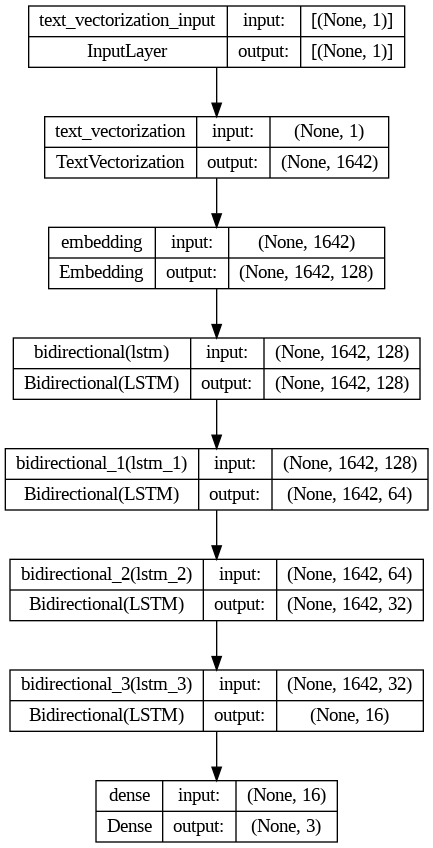

In [49]:

# plot layers

tf.keras.utils.plot_model(model_improve, show_shapes=True)

Model improve secara layer sama dengan model base line perbedaannya:

- Empat layer LSTM dengan jenis Bidirectional, yang artinya setiap LSTM memiliki dua rangkaian sel LSTM (masing-masing maju dan mundur). Jumlah unit LSTM dari besar ke kecil (64, 32, 16, 8) menunjukkan bahwa lapisan-lapisan ini semakin kompleks atau abstrak. return_sequences=True mengindikasikan bahwa LSTM mengembalikan urutan output untuk setiap timestep dalam input

- Dropout layers dengan tingkat dropout sebesar 0.15 diterapkan setelah setiap layer LSTM untuk mengurangi overfitting dengan secara acak menghapus unit-unit selama pelatihan.

- Menggunakan Adam optimizer dengan learning rate (lr) sebesar 0.0001.

# X Model Improvement Training

Pada model improvement training saya menambahkan callbacks.Penggunaan EarlyStopping pada proses pelatihan model sangat penting karena callback ini memungkinkan model untuk berhenti melatih dirinya sendiri saat tidak ada peningkatan yang signifikan dalam metrik evaluasi yang dipantau, seperti loss pada data validasi. Hal ini tidak hanya mencegah overfitting dengan menghentikan pelatihan tepat waktu, tetapi juga meningkatkan efisiensi pelatihan dengan menghemat komputasi.

In [50]:
# Callbacks
callback = EarlyStopping(monitor='val_loss', patience=4)
# Model training
model_improve_hist = model_improve.fit(X_train, y_train, epochs=25, batch_size = 128, validation_data=(X_val, y_val), callbacks=[callback])

Epoch 1/25
116/116 [==============================] - 73s 536ms/step - loss: 0.6056 - accuracy: 0.7835 - auc: 0.9036 - val_loss: 0.4754 - val_accuracy: 0.8266 - val_auc: 0.9437
Epoch 2/25
116/116 [==============================] - 57s 493ms/step - loss: 0.3733 - accuracy: 0.8647 - auc: 0.9633 - val_loss: 0.4042 - val_accuracy: 0.8485 - val_auc: 0.9571
Epoch 3/25
116/116 [==============================] - 57s 488ms/step - loss: 0.2580 - accuracy: 0.9063 - auc: 0.9814 - val_loss: 0.4820 - val_accuracy: 0.8140 - val_auc: 0.9459
Epoch 4/25
116/116 [==============================] - 57s 494ms/step - loss: 0.1901 - accuracy: 0.9364 - auc: 0.9888 - val_loss: 0.5254 - val_accuracy: 0.8190 - val_auc: 0.9432
Epoch 5/25
116/116 [==============================] - 56s 479ms/step - loss: 0.1268 - accuracy: 0.9620 - auc: 0.9941 - val_loss: 0.5943 - val_accuracy: 0.8144 - val_auc: 0.9402
Epoch 6/25
116/116 [==============================] - 54s 468ms/step - loss: 0.0920 - accuracy: 0.9739 - auc: 0.996

In [51]:
history_improve_df = pd.DataFrame(model_improve_hist.history)
history_improve_df.tail(5)

,loss,accuracy,auc,val_loss,val_accuracy,val_auc
1,0.373293,0.864699,0.963271,0.404228,0.848450,0.957144
2,0.257959,0.906309,0.981441,0.481962,0.814007,0.945919
3,0.190051,0.936369,0.988821,0.525379,0.818982,0.943196
4,0.126844,0.962037,0.994088,0.594331,0.814390,0.940237
5,0.092020,0.973926,0.996028,0.690085,0.796785,0.932382


Implementasi early stopping dalam pelatihan model menunjukkan bahwa model berhasil memperbaiki performa secara signifikan dari iterasi pertama hingga saat early stopping diterapkan. Terjadi penurunan yang konsisten dalam nilai loss dan peningkatan dalam akurasi selama proses pelatihan. Meskipun terjadi peningkatan sedikit dalam `val_loss` pada data validasi setelah beberapa epoch, hal ini mengindikasikan bahwa model mungkin mengalami overfitting terhadap data pelatihan. Early stopping membantu mencegah overfitting dengan menghentikan pelatihan saat tidak ada peningkatan yang signifikan dalam performa pada data validasi, sehingga memastikan bahwa model yang dihasilkan lebih mampu untuk generalisasi dan lebih efisien dalam penggunaan sumber daya komputasi.

<Axes: title={'center': 'Train vs Validation (Loss Function)'}>

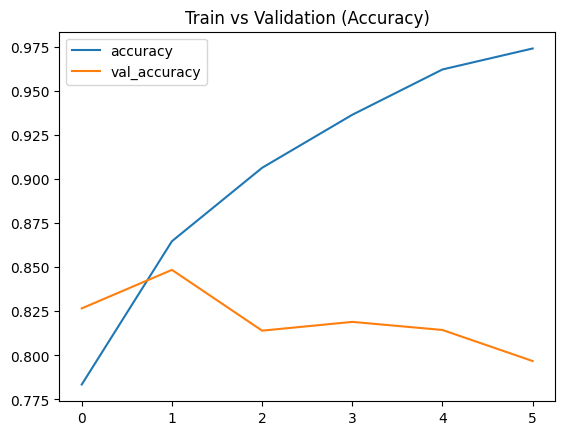

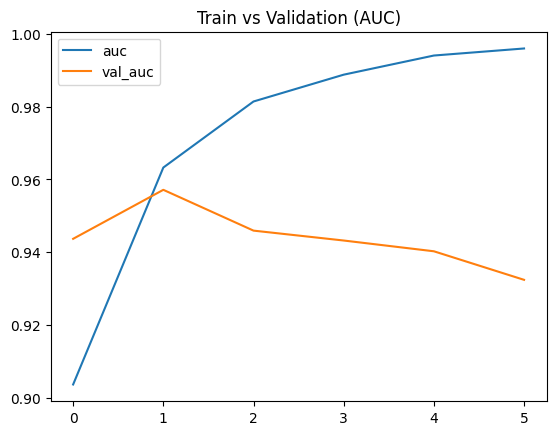

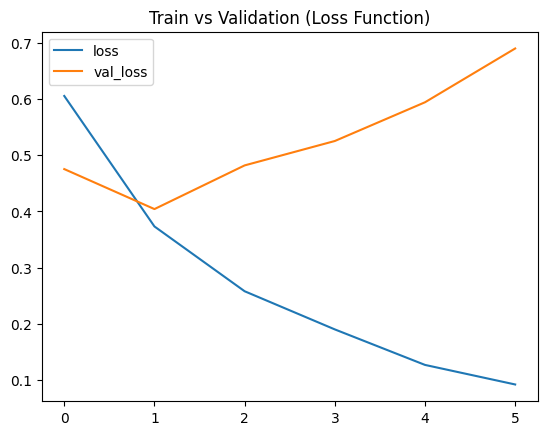

In [52]:
# Plot Traning Results
history_improve_df[['accuracy', 'val_accuracy']].plot(title='Train vs Validation (Accuracy)')
history_improve_df[['auc', 'val_auc']].plot(title='Train vs Validation (AUC)')
history_improve_df[['loss', 'val_loss']].plot(title='Train vs Validation (Loss Function)')

Terlihat pada grafik jika tidak diterapkan early stoping seiring bertambahnya epoch akan terjadi overfiting pada model.

In [56]:
# classification report
y_pred_improve_proba = model_improve.predict(X_test)

y_pred_improve = np.argmax(y_pred_improve_proba, axis=1)
if len(y_test.shape) > 1 and y_test.shape[1] > 1:
    y_test = np.argmax(y_test, axis=1)

target = ['Negative', 'Neutral', 'Positive']

# Cetak laporan klasifikasi
print(classification_report(y_test, y_pred_improve, target_names=target))

97/97 [==============================] - 18s 184ms/step
              precision    recall  f1-score   support

    Negative       0.76      0.67      0.72       482
     Neutral       0.28      0.43      0.34       328
    Positive       0.92      0.87      0.90      2264

    accuracy                           0.80      3074
   macro avg       0.66      0.66      0.65      3074
weighted avg       0.83      0.80      0.81      3074

Accuracy: 0.80


Hasil evaluasi model menunjukkan bahwa untuk kelas "Negative", model memiliki presisi 0.76 dan recall 0.67, sementara untuk kelas "Neutral" presisi rendah (0.28) dan recall sedang (0.43), dengan f1-score 0.34 yang menunjukkan perluasan dalam klasifikasi kelas "Neutral". Untuk kelas "Positive", model menunjukkan kinerja yang sangat baik dengan presisi 0.92, recall 0.87, dan f1-score 0.90. Secara keseluruhan, model mencapai akurasi 0.80, dengan f1-score rata-rata tertimbang 0.81. Evaluasi ini menyoroti kinerja model sudah lebih baik dari pada base model dalam mengenali kelas "Positive", "Negative" dan "Neutral".

In [58]:
# Perhitungan AUC
prob_improve = model_improve.predict(X_test)
auc_improve = roc_auc_score(y_test, prob_improve, multi_class='ovr')
auc_improve

97/97 [==============================] - 18s 184ms/step


0.8769453485411237

Nilai AUC (Area Under the Curve) sebesar 0.8769 menunjukkan bahwa model klasifikasi memiliki kemampuan yang baik dalam membedakan antara kelas-kelas yang berbeda. Insight utamanya adalah terjadi peningkatan signifikan dibandingkan dengan baseline model sebelumnya. Peningkatan ini menunjukkan bahwa model yang diperbaiki atau yang telah diimplementasikan memiliki kemampuan yang lebih baik dalam memprediksi dengan tepat kelas-kelas target.

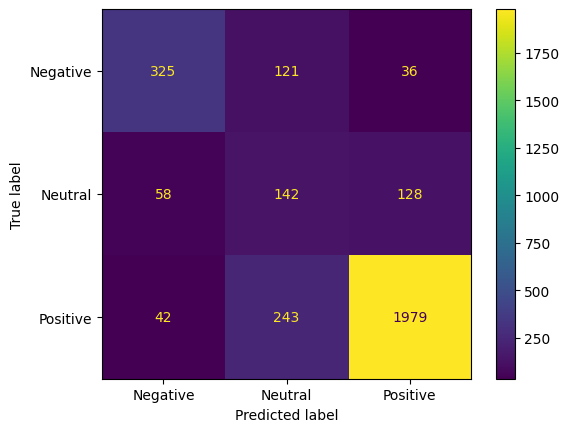

In [62]:
# Hitung confusion matrix
cm_test_improve = confusion_matrix(y_test, y_pred_improve)

# Tampilkan confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test_improve, display_labels=target)
disp.plot()

Dari analisis confusion matrix yang diberikan, terlihat bahwa model memiliki kinerja yang baik dalam memprediksi kelas positive, dengan 1979 prediksi benar. Namun, terdapat tantangan dalam membedakan antara kelas negative dan neutral, serta antara kelas neutral dan positive, seperti yang ditunjukkan oleh jumlah kesalahan yang signifikan. Model cenderung lebih sering salah memprediksi kelas neutral sebagai positive daripada sebaliknya

Overal analisis kedua model

**Model Baseline**:

Model ini menggunakan LSTM secara berurutan dengan jumlah unit yang berkurang dari 64 ke 8. Optimizer yang digunakan adalah Adam dengan loss function categorical crossentropy dan metrik yang dipantau adalah akurasi dan AUC.

**Model Improved** (model_improve):

Model ini menggunakan beberapa peningkatan dibandingkan dengan baseline:

- Menggunakan Bidirectional(LSTM()) untuk semua lapisan LSTM, memungkinkan model untuk memanfaatkan informasi dari kedua arah.
- Menambahkan dropout setelah setiap lapisan LSTM dengan dropout rate 0.15 untuk mengurangi overfitting.
- Menggunakan optimizer Adam dengan learning rate yang lebih rendah (lr=0.0001) untuk meningkatkan stabilitas pembelajaran.

Alasan mengapa model improve lebih baik:
- Dengan menggunakan Bidirectional LSTM, model_improve dapat lebih baik dalam menangkap dependensi temporal dalam ulasan hotel, yang sering kali memiliki urutan kata yang penting untuk memahami sentimen.

- Dropout yang diterapkan setelah setiap lapisan LSTM membantu mengurangi kemungkinan overfitting, yang dapat terjadi ketika model terlalu kompleks atau terlalu bergantung pada data latih tertentu.

- Pengaturan optimizer yang lebih spesifik dengan learning rate yang lebih rendah dapat membantu model_improve dalam mencapai konvergensi yang lebih baik dan mencegah kemungkinan overshooting selama proses pembelajaran.


#XI Model Saving

Model improve yang akan disimpan dan dijadikan model utama untuk dilakukan inference dan deployment.

In [59]:
# Model summary

model_improve.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVe  (None, 1642)              0         
 ctorization)                                                    
                                                                 
 embedding (Embedding)       (None, 1642, 128)         5886080   
                                                                 
 bidirectional (Bidirection  (None, 1642, 128)         98816     
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 1642, 64)          41216     
 onal)                                                           
                                                                 
 bidirectional_2 (Bidirecti  (None, 1642, 32)          10368     
 onal)                                                  

In [60]:
# Freeze model

model_improve.trainable = False
model_improve.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVe  (None, 1642)              0         
 ctorization)                                                    
                                                                 
 embedding (Embedding)       (None, 1642, 128)         5886080   
                                                                 
 bidirectional (Bidirection  (None, 1642, 128)         98816     
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 1642, 64)          41216     
 onal)                                                           
                                                                 
 bidirectional_2 (Bidirecti  (None, 1642, 32)          10368     
 onal)                                                  

In [65]:
# Save best model

model_improve.save('best_model.keras')

#XII Kesimpulan

- Berdasarkan analisis ulasan hotel, mayoritas ulasan memiliki rating 5, mencapai 44.2% dari total data, yang mengindikasikan kepuasan tinggi. Kategori positif (rating 4 dan 5) menjadi yang paling dominan, sementara ulasan netral (rating 3) relatif sedikit dibandingkan dengan ulasan negatif (rating 1 dan 2). Hal ini menggambarkan ketidakseimbangan dalam data, di mana kepuasan cenderung mendominasi, namun kritik juga signifikan.

- Ulasan positif menyoroti kepuasan pelanggan terhadap layanan dan fasilitas hotel tanpa kritik yang signifikan. Ulasan netral, meskipun cenderung lebih panjang, memberikan masukan untuk perbaikan tertentu. Sedangkan ulasan negatif mencerminkan ketidakpuasan pelanggan terhadap berbagai aspek hotel. Kesimpulannya, untuk meningkatkan layanan dan kepuasan pelanggan, fokus harus diberikan pada memahami dan menanggapi baik ulasan netral maupun negatif, sambil mempertahankan standar tinggi yang mendukung ulasan positif yang dominan.

- Model improvement memiliki kinerja yang baik dengan akurasi mencapai sekitar 97.39% dan AUC sebesar 99.60% pada data pelatihan. Namun, performa pada data validasi menunjukkan adanya penurunan, yang menunjukkan kemungkinan overfitting atau perlu penyesuaian lebih lanjut terhadap generalisasi model.

- Terlihat bahwa kelas Positive (rating 5) mendominasi dengan 44.2% dari total data, sedangkan kelas Neutral (rating 3) merupakan yang paling sedikit dengan hanya 328 sampel (10.7%). Hal ini menunjukkan ketidakseimbangan yang signifikan dalam distribusi data, di mana kelas minoritas seperti Neutral mungkin memiliki pengaruh yang kurang signifikan dalam pembelajaran model.

- Dari confusion matrix, terlihat bahwa model cenderung lebih baik dalam mengklasifikasikan ulasan sebagai Positive (klasifikasi dengan presisi dan recall yang tinggi), tetapi memiliki tantangan dalam membedakan antara kelas Negative dan Neutral. Model cenderung salah memprediksi kelas Neutral sebagai Positive lebih sering daripada sebaliknya, menunjukkan perlunya peningkatan dalam deteksi sentimen netral.

- Untuk meningkatkan kinerja model, dapat dipertimbangkan untuk mengimplementasikan strategi seperti penanganan ketidakseimbangan kelas (oversampling atau undersampling), tuning hyperparameter lebih lanjut (misalnya, dropout rate, learning rate), dan eksplorasi model yang lebih kompleks untuk menangkap pola-pola yang lebih halus dalam ulasan.

- Meskipun model memiliki kinerja yang baik dalam klasifikasi sentimen positif, ada ruang untuk meningkatkan kemampuan dalam mengenali sentimen netral dan negatif. Fokus pada analisis ulasan yang lebih mendalam dan penyesuaian model dapat membantu meningkatkan keakuratan dan kegunaan dalam aplikasi analisis sentimen untuk ulasan hotel.

- Dengan menggunakan model ini untuk menganalisis ulasan hotel secara otomatis, bisnis dapat lebih responsif terhadap masukan dan keluhan pelanggan. Ini memungkinkan mereka untuk segera mengidentifikasi dan menanggapi permasalahan yang mungkin muncul, meningkatkan kepuasan pelanggan secara keseluruhan.

- Model ini dapat meningkatkan efisiensi operasional dengan mengotomatiskan proses analisis ulasan. Hal ini mengurangi waktu dan upaya yang diperlukan dalam menganalisis ulasan secara manual, sehingga tim dapat fokus pada tindakan perbaikan yang lebih strategis dan efektif.

- Analisis yang lebih mendalam terhadap ulasan pelanggan dapat memberikan wawasan berharga untuk pengambilan keputusan. Bisnis dapat menggunakan informasi ini untuk mengembangkan strategi pemasaran yang lebih efektif, mengidentifikasi tren pasar, dan meningkatkan diferensiasi dari pesaing.
